In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_csv ("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [36]:
features = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'FullBath', 'HalfBath', 'GarageCars', 'GarageArea',
    'GrLivArea', 'TotRmsAbvGrd', 'SalePrice'
]

data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0.0)
data['GarageCars'] = data['GarageCars'].fillna(0.0)
data['GarageArea'] = data['GarageArea'].fillna(0.0)

In [37]:
X = data[features] 
y = data['SalePrice']               

In [38]:
X = pd.get_dummies(X)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [40]:
import tensorflow.keras.backend as K


def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear') 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=rmse)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 197371.2969 - val_loss: 198244.6094
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196615.3594 - val_loss: 198119.9844
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 195086.5938 - val_loss: 197485.7812
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 195965.5469 - val_loss: 195398.5625
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 192257.5469 - val_loss: 190185.0469
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 185619.6719 - val_loss: 179666.2500
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175287.5312 - val_loss: 160999.6250
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155840.2031 - val_loss: 133446.6094
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 130443.9062 - val_loss: 101099.8594
Epoch 10/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102111.2734 - val_loss: 79813.4531
Epoch 11/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

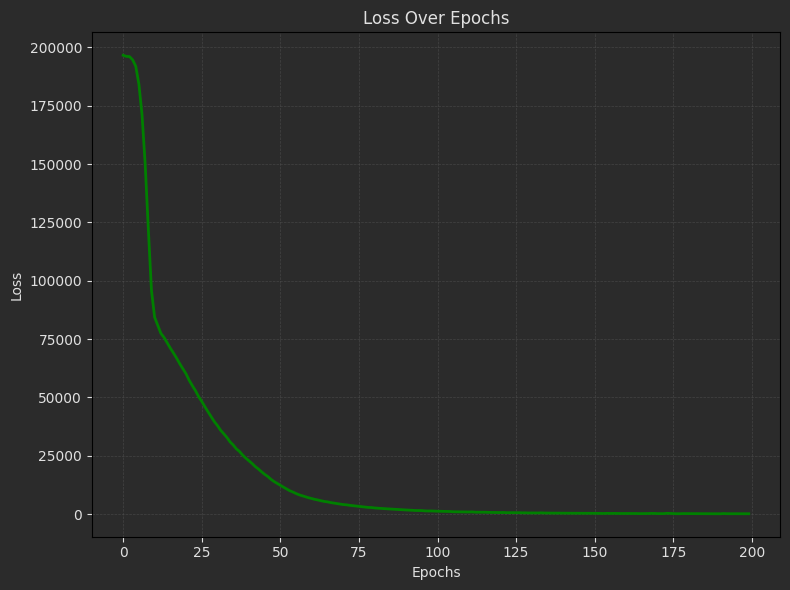

In [43]:
fig, ax = plt.subplots(figsize=(8, 6)) 
fig.patch.set_facecolor('#2b2b2b')  

ax.plot(history.history['loss'], color='green', linewidth=2)
ax.set_title("Loss Over Epochs", color='#e0e0e0')
ax.set_xlabel("Epochs", color='#e0e0e0')
ax.set_ylabel("Loss", color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b') 

plt.tight_layout()
plt.show()


In [44]:
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 577.4790
Validation Loss: 644.8496704101562


In [45]:
model.save('house_price_model.h5')

In [46]:
example_house = np.array([X_val[0]]) 
predicted_price = model.predict(example_house)
print(f'Predicted Price: {predicted_price[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Predicted Price: 154434.5625
